In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random

In [2]:
# Poznámka k rozložení dat
print("\n=== POZNÁMKA K ROZLOŽENÍ DAT ===")
print("Z histogramů je patrné, že některá kritéria nemají normální rozložení.")
print("Pro metody WSA a TOPSIS to však není problém - tyto metody nevyžadují normalitu dat.")
print("Důvody pro nenormální rozložení mohou být:")
print("1. Jedná se o reálná data z trhu s nemovitostmi, která často nemají normální rozložení")
print("2. Velikost vzorku (50 bytů) je relativně malá pro zajištění normálního rozložení")
print("3. Specifická povaha kritérií - například ceny bytů v centru města bývají výrazně vyšší")
print("\nTato skutečnost neovlivňuje validitu výsledků vícekriteriální analýzy, protože:")
print("- Metody WSA a TOPSIS pracují s normalizovanými hodnotami")
print("- Nenormální rozložení je typické pro reálná data z trhu s nemovitostmi")
print("- V rámci vícekriteriálního rozhodování nás zajímá především relativní porovnání variant")


=== POZNÁMKA K ROZLOŽENÍ DAT ===
Z histogramů je patrné, že některá kritéria nemají normální rozložení.
Pro metody WSA a TOPSIS to však není problém - tyto metody nevyžadují normalitu dat.
Důvody pro nenormální rozložení mohou být:
1. Jedná se o reálná data z trhu s nemovitostmi, která často nemají normální rozložení
2. Velikost vzorku (50 bytů) je relativně malá pro zajištění normálního rozložení
3. Specifická povaha kritérií - například ceny bytů v centru města bývají výrazně vyšší

Tato skutečnost neovlivňuje validitu výsledků vícekriteriální analýzy, protože:
- Metody WSA a TOPSIS pracují s normalizovanými hodnotami
- Nenormální rozložení je typické pro reálná data z trhu s nemovitostmi
- V rámci vícekriteriálního rozhodování nás zajímá především relativní porovnání variant


In [3]:
# 1. Načtení dat

# Generování syntetických dat pro analýzu
random.seed(42)  # Generování fiktivních čísel inzerátů (5-místné náhodné číslo, seed 42 pro reprodukovatelnost)
inzerat_ids = random.sample(range(10000, 99999), 50)

seed_data = {
    'Číslo inzerátu': inzerat_ids,
    'Lokalita': [
        'Praha 1 - Staré Město', 'Praha 1 - Nové Město', 'Praha 2 - Vinohrady', 'Praha 2 - Nusle',
        'Praha 3 - Žižkov', 'Praha 3 - Jarov', 'Praha 4 - Nusle', 'Praha 4 - Michle',
        'Praha 4 - Podolí', 'Praha 5 - Smíchov', 'Praha 5 - Košíře', 'Praha 6 - Dejvice',
        'Praha 6 - Břevnov', 'Praha 7 - Holešovice', 'Praha 7 - Letná', 'Praha 8 - Karlín',
        'Praha 8 - Libeň', 'Praha 9 - Vysočany', 'Praha 9 - Prosek', 'Praha 10 - Vršovice',
        'Praha 10 - Strašnice', 'Praha 1 - Josefov', 'Praha 2 - Vyšehrad', 'Praha 3 - Vinohradská',
        'Praha 4 - Pankrác', 'Praha 5 - Anděl', 'Praha 6 - Hradčanská', 'Praha 7 - Výstaviště',
        'Praha 8 - Kobylisy', 'Praha 9 - Černý Most', 'Praha 10 - Malešice', 'Praha 1 - Malá Strana',
        'Praha 2 - Albertov', 'Praha 3 - Flora', 'Praha 4 - Budějovická', 'Praha 5 - Radlice',
        'Praha 6 - Petřiny', 'Praha 7 - Bubeneč', 'Praha 8 - Bohnice', 'Praha 9 - Střížkov',
        'Praha 10 - Záběhlice', 'Praha 1 - Můstek', 'Praha 2 - Náměstí Míru', 'Praha 3 - Ohrada',
        'Praha 4 - Kačerov', 'Praha 5 - Jinonice', 'Praha 6 - Veleslavín', 'Praha 7 - Troja',
        'Praha 8 - Ďáblice', 'Praha 10 - Skalka'
    ],
    'Cena nájmu (Kč/měsíc)': [
        25000, 23500, 19800, 17500, 16800, 15200, 16500, 14800, 18200, 19500,
        15900, 21000, 18500, 17800, 19200, 20500, 16200, 15500, 14200, 16800,
        15700, 27500, 19900, 18200, 17500, 21000, 22500, 16800, 15200, 13800,
        14500, 29000, 18500, 17900, 16800, 15500, 17200, 18800, 14200, 13900,
        14800, 26500, 20500, 15800, 15200, 14900, 16500, 17800, 14500, 14200
    ],
    'Vzdálenost od pracoviště (min)': [
        15, 18, 22, 25, 30, 35, 28, 32, 25, 20,
        35, 28, 32, 22, 18, 15, 25, 30, 38, 25,
        32, 12, 20, 25, 28, 18, 22, 28, 35, 45,
        38, 20, 25, 22, 30, 35, 32, 25, 40, 42,
        35, 15, 18, 32, 35, 38, 30, 32, 42, 40
    ],
    'Plocha bytu (m²)': [
        48, 52, 55, 62, 58, 65, 61, 68, 52, 47,
        70, 56, 65, 49, 45, 42, 59, 63, 67, 58,
        65, 40, 54, 60, 66, 49, 51, 62, 72, 75,
        68, 45, 56, 53, 64, 70, 68, 55, 74, 76,
        69, 43, 50, 66, 70, 72, 64, 58, 78, 73
    ],
    'Stav bytu (1-10)': [
        8, 7, 8, 6, 5, 6, 7, 5, 7, 8,
        6, 8, 7, 7, 8, 9, 6, 6, 5, 7,
        6, 9, 8, 7, 8, 9, 8, 5, 6, 7,
        5, 9, 7, 8, 7, 6, 7, 8, 6, 5,
        6, 9, 8, 5, 6, 5, 7, 7, 6, 5
    ],
    'Okolí a občanská vybavenost (1-10)': [
        10, 9, 9, 7, 8, 6, 7, 6, 8, 9,
        7, 9, 8, 8, 9, 8, 7, 6, 5, 7,
        6, 10, 8, 8, 7, 9, 9, 7, 6, 5,
        5, 10, 8, 8, 7, 6, 7, 8, 5, 5,
        6, 10, 9, 6, 6, 5, 6, 7, 5, 5
    ],
    'Hlučnost (dB)': [
        65, 62, 56, 54, 60, 52, 58, 55, 50, 59,
        52, 51, 48, 57, 58, 61, 56, 57, 53, 55,
        54, 64, 52, 59, 57, 60, 55, 58, 50, 51,
        52, 58, 53, 56, 54, 49, 47, 53, 48, 50,
        51, 66, 57, 55, 53, 48, 50, 49, 46, 52
    ]
}

# Cesta k CSV souboru
csv_dataset_file_path = "dataset/byty.csv"

# Kontrola existence CSV souboru
if os.path.exists(csv_dataset_file_path):
    try:
        df = pd.read_csv(csv_dataset_file_path)
        print(f"Data načtena ze souboru: {csv_dataset_file_path}")
    except Exception as e:
        print(f"Došlo k chybě při načítání souboru ({e}), použita a uložena výchozí data.")
        df = pd.DataFrame(seed_data)
        df.to_csv(csv_dataset_file_path, index=False)
else:
    print("Soubor byty.csv neexistuje, použita a uložena výchozí data.")
    df = pd.DataFrame(seed_data)
    df.to_csv(csv_dataset_file_path, index=False)

# Nastavení sloupce "Číslo inzerátu" jako index (pokud existuje)
if 'Číslo inzerátu' in df.columns:
    df.set_index('Číslo inzerátu', inplace=True)
else:
    print("Sloupec 'Číslo inzerátu' nebyl nalezen v datech.")


# Prohlédnutí dat
print("Přehled dat:")
display(df.head())

print("\nZákladní statistiky:")
display(df.describe())

Data načtena ze souboru: dataset/byty.csv
Přehled dat:


,Lokalita,Cena nájmu (Kč/měsíc),Vzdálenost od pracoviště (min),Plocha bytu (m²),Stav bytu (1-10),Okolí a občanská vybavenost (1-10),Hlučnost (dB)
Číslo inzerátu,,,,,,,
93810,Praha 1 - Staré Město,25000,15,48,8,10,65
24592,Praha 1 - Nové Město,23500,18,52,7,9,62
13278,Praha 2 - Vinohrady,19800,22,55,8,9,56
46048,Praha 2 - Nusle,17500,25,62,6,7,54
42098,Praha 3 - Žižkov,16800,30,58,5,8,60



Základní statistiky:


,Cena nájmu (Kč/měsíc),Vzdálenost od pracoviště (min),Plocha bytu (m²),Stav bytu (1-10),Okolí a občanská vybavenost (1-10),Hlučnost (dB)
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,17950.000000,28.180000,60.160000,6.820000,7.240000,54.52000
std,3565.094383,8.125772,9.879602,1.256656,1.546028,4.71316
min,13800.000000,12.000000,40.000000,5.000000,5.000000,46.00000
25%,15275.000000,22.000000,52.250000,6.000000,6.000000,51.00000
50%,17000.000000,28.000000,61.500000,7.000000,7.000000,54.00000
75%,19425.000000,35.000000,68.000000,8.000000,8.000000,57.75000
max,29000.000000,45.000000,78.000000,9.000000,10.000000,66.00000


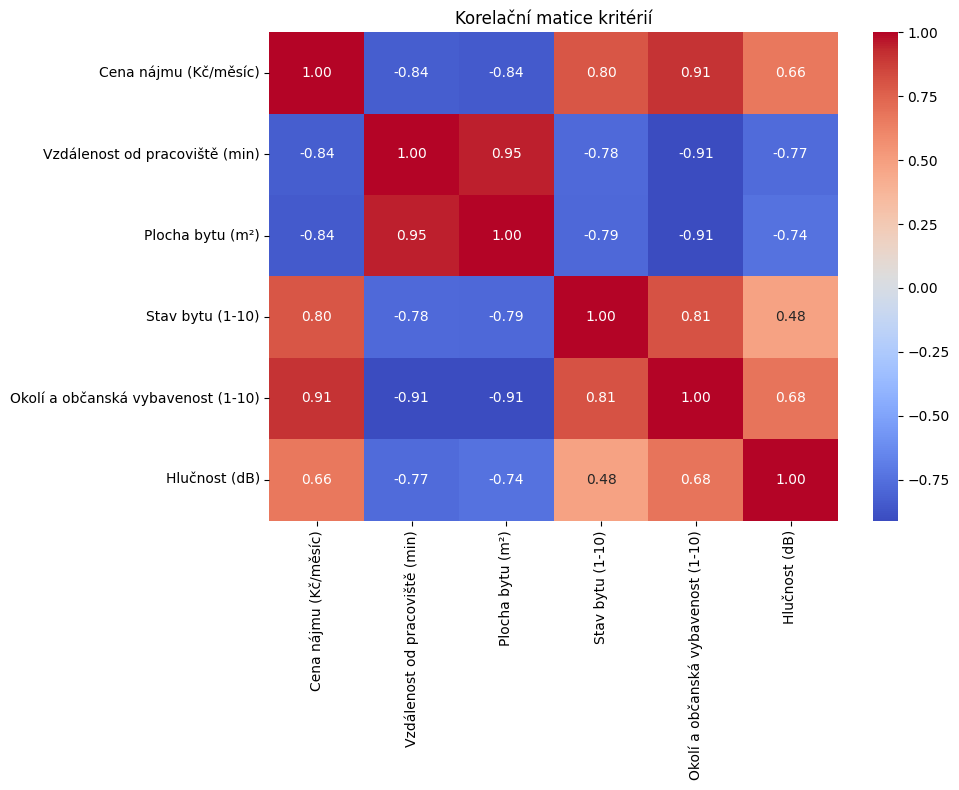

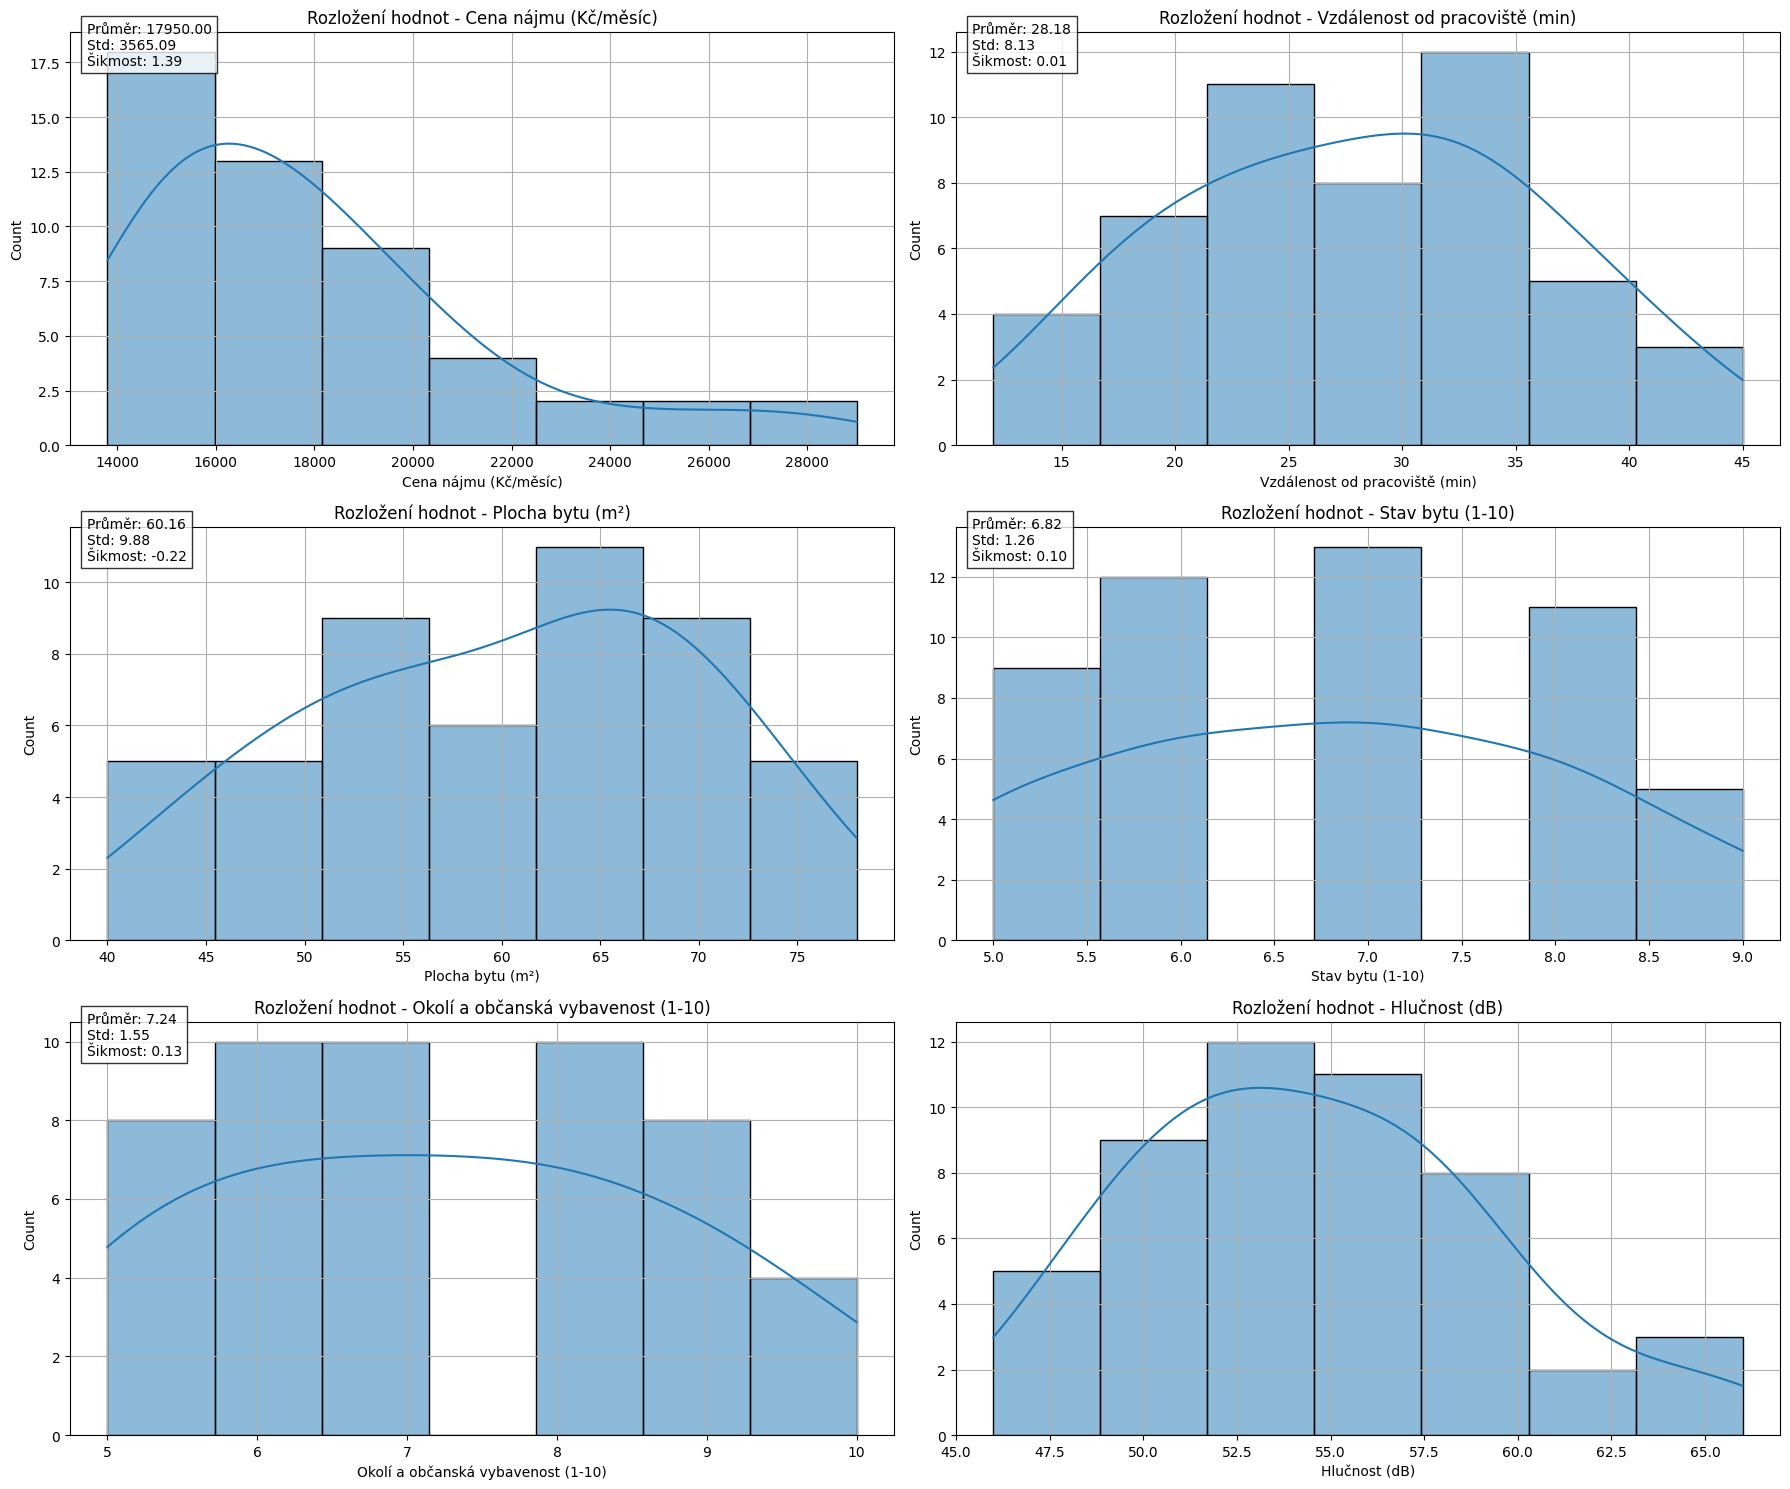

In [4]:
# 2. Vizualizace dat
# Korelační matice (bez sloupce Číslo inzerátu, který je nyní indexem)
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelační matice kritérií')
plt.tight_layout()
plt.show()

# Rozložení hodnot kritérií
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Rozložení hodnot - {col}')
    axes[i].grid(True)
    
    # Přidáme poznámku o rozložení dat
    if i < len(axes)-1:  # Aby nezobrazoval u nevyužitých os
        mean_val = df[col].mean()
        std_val = df[col].std()
        skew_val = df[col].skew()
        axes[i].text(0.02, 0.92, f"Průměr: {mean_val:.2f}\nStd: {std_val:.2f}\nŠikmost: {skew_val:.2f}", 
                   transform=axes[i].transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [5]:
# 3. Vícekriteriální analýza - Metoda váženého součtu (WSA)

# Definice vah kritérií (můžete upravit podle svých preferencí)
weights = {
    'Cena nájmu (Kč/měsíc)': 0.25,        # Minimalizační
    'Vzdálenost od pracoviště (min)': 0.2, # Minimalizační
    'Plocha bytu (m²)': 0.15,              # Maximalizační
    'Stav bytu (1-10)': 0.15,              # Maximalizační
    'Okolí a občanská vybavenost (1-10)': 0.15, # Maximalizační
    'Hlučnost (dB)': 0.1                   # Minimalizační
}

# Ověření, že součet vah je 1
assert abs(sum(weights.values()) - 1.0) < 1e-10, "Součet vah musí být přesně 1"

# Vytvoření kopie DataFrame pro normalizaci
df_norm = df.copy()

# Identifikace minimalizačních a maximalizačních kritérií
min_criteria = ['Cena nájmu (Kč/měsíc)', 'Vzdálenost od pracoviště (min)', 'Hlučnost (dB)']
max_criteria = ['Plocha bytu (m²)', 'Stav bytu (1-10)', 'Okolí a občanská vybavenost (1-10)']

# Normalizace hodnot - metoda WSA
for col in min_criteria + max_criteria:
    min_val = df[col].min()
    max_val = df[col].max()
    
    if col in min_criteria:
        # Pro minimalizační kritéria: (max - x) / (max - min)
        df_norm[col] = (max_val - df[col]) / (max_val - min_val)
    else:
        # Pro maximalizační kritéria: (x - min) / (max - min)
        df_norm[col] = (df[col] - min_val) / (max_val - min_val)

# Výpočet užitku pro každou variantu
df_norm['Užitek'] = sum(df_norm[col] * weights[col] for col in weights.keys())

# Seřazení variant podle užitku (sestupně)
df_sorted = df_norm.sort_values('Užitek', ascending=False).reset_index()

# Výsledky
df_sorted_displayed = df_sorted.set_index('Číslo inzerátu')
print("\nNejlepších 10 variant podle metody WSA:")
display(df_sorted_displayed[['Lokalita', 'Užitek']].head(10))


Nejlepších 10 variant podle metody WSA:


,Lokalita,Užitek
Číslo inzerátu,,
13278,Praha 2 - Vinohrady,0.632420
64987,Praha 5 - Anděl,0.630742
36062,Praha 2 - Vyšehrad,0.628949
54597,Praha 3 - Flora,0.625776
57052,Praha 2 - Náměstí Míru,0.620413
13905,Praha 7 - Letná,0.617057
54118,Praha 7 - Bubeneč,0.615686
38221,Praha 6 - Petřiny,0.613393
81426,Praha 4 - Pankrác,0.612307


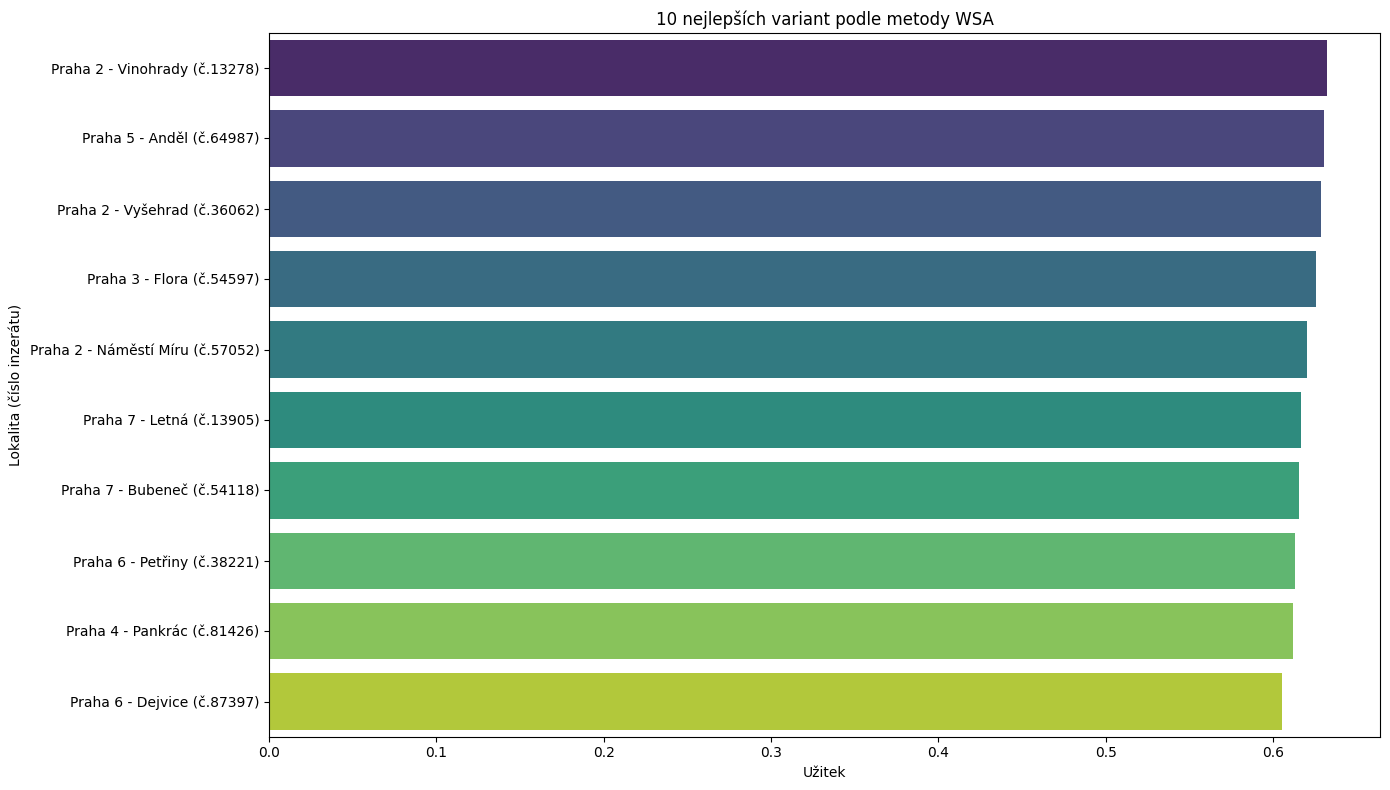

In [6]:
# 4. Vizualizace výsledků
plt.figure(figsize=(14, 8))
# Vytvoříme sloučený label s lokalitou a číslem inzerátu
df_sorted['Inzerát a lokalita'] = df_sorted['Lokalita'] + ' (č.' + df_sorted['Číslo inzerátu'].astype(str) + ')'
sns.barplot(x='Užitek', y='Inzerát a lokalita', hue='Lokalita', data=df_sorted.head(10), palette='viridis', legend=False)
plt.title('10 nejlepších variant podle metody WSA')
plt.xlabel('Užitek')
plt.ylabel('Lokalita (číslo inzerátu)')
plt.tight_layout()
plt.show()

In [7]:
# 5. Analýza citlivosti - jak se mění pořadí variant při změně vah
# Simulace různých priorit uživatele

# Definice několika sad vah reprezentujících různé preference
weight_scenarios = {
    'Důraz na cenu': {
        'Cena nájmu (Kč/měsíc)': 0.50,
        'Vzdálenost od pracoviště (min)': 0.15,
        'Plocha bytu (m²)': 0.10,
        'Stav bytu (1-10)': 0.10,
        'Okolí a občanská vybavenost (1-10)': 0.10,
        'Hlučnost (dB)': 0.05
    },
    'Důraz na lokalitu': {
        'Cena nájmu (Kč/měsíc)': 0.15,
        'Vzdálenost od pracoviště (min)': 0.30,
        'Plocha bytu (m²)': 0.10,
        'Stav bytu (1-10)': 0.10,
        'Okolí a občanská vybavenost (1-10)': 0.30,
        'Hlučnost (dB)': 0.05
    },
    'Důraz na komfort': {
        'Cena nájmu (Kč/měsíc)': 0.15,
        'Vzdálenost od pracoviště (min)': 0.10,
        'Plocha bytu (m²)': 0.25,
        'Stav bytu (1-10)': 0.25,
        'Okolí a občanská vybavenost (1-10)': 0.15,
        'Hlučnost (dB)': 0.10
    },
    'Vyvážený přístup': {
        'Cena nájmu (Kč/měsíc)': 0.20,
        'Vzdálenost od pracoviště (min)': 0.20,
        'Plocha bytu (m²)': 0.15,
        'Stav bytu (1-10)': 0.15,
        'Okolí a občanská vybavenost (1-10)': 0.15,
        'Hlučnost (dB)': 0.15
    }
}

# Výpočet užitků pro každý scénář
results = {}

for scenario_name, scenario_weights in weight_scenarios.items():
    # Ověření, že součet vah je 1
    assert abs(sum(scenario_weights.values()) - 1.0) < 1e-10, f"Součet vah pro scénář {scenario_name} musí být přesně 1"
    
    # Výpočet užitku pro každou variantu
    df_temp = df_norm.copy()
    df_temp[f'Užitek_{scenario_name}'] = sum(df_norm[col] * scenario_weights[col] for col in scenario_weights.keys())
    
    # Seřazení variant podle užitku (sestupně)
    df_temp = df_temp.sort_values(f'Užitek_{scenario_name}', ascending=False)
    
    # Uložení nejlepších 5 variant pro každý scénář
    results[scenario_name] = df_temp[['Lokalita', f'Užitek_{scenario_name}']].head(5)

# Zobrazení výsledků pro různé scénáře
for scenario_name, result_df in results.items():
    print(f"\nNejlepších 5 variant pro scénář: {scenario_name}")
    display(result_df)


Nejlepších 5 variant pro scénář: Důraz na cenu


,Lokalita,Užitek_Důraz na cenu
Číslo inzerátu,,
46463,Praha 9 - Černý Most,0.679605
59797,Praha 10 - Záběhlice,0.671376
23396,Praha 8 - Bohnice,0.669043
87236,Praha 8 - Kobylisy,0.668612
80284,Praha 8 - Ďáblice,0.665610



Nejlepších 5 variant pro scénář: Důraz na lokalitu


,Lokalita,Užitek_Důraz na lokalitu
Číslo inzerátu,,
83563,Praha 1 - Josefov,0.719803
93810,Praha 1 - Staré Město,0.710754
22676,Praha 1 - Můstek,0.705293
64987,Praha 5 - Anděl,0.703086
57052,Praha 2 - Náměstí Míru,0.693152



Nejlepších 5 variant pro scénář: Důraz na komfort


,Lokalita,Užitek_Důraz na komfort
Číslo inzerátu,,
81426,Praha 4 - Pankrác,0.628555
38221,Praha 6 - Petřiny,0.620052
64987,Praha 5 - Anděl,0.619976
87397,Praha 6 - Dejvice,0.618226
13278,Praha 2 - Vinohrady,0.616671



Nejlepších 5 variant pro scénář: Vyvážený přístup


,Lokalita,Užitek_Vyvážený přístup
Číslo inzerátu,,
36062,Praha 2 - Vyšehrad,0.634015
13278,Praha 2 - Vinohrady,0.627157
38221,Praha 6 - Petřiny,0.622077
64987,Praha 5 - Anděl,0.619426
87397,Praha 6 - Dejvice,0.616451


In [8]:
# 6. Interaktivní vizualizace pomocí Plotly
# Paralelní souřadnice - umožňují vizualizovat mnohorozměrná data
fig = px.parallel_coordinates(
    df_sorted.head(10),
    dimensions=['Cena nájmu (Kč/měsíc)', 'Vzdálenost od pracoviště (min)', 'Plocha bytu (m²)', 
                'Stav bytu (1-10)', 'Okolí a občanská vybavenost (1-10)', 'Hlučnost (dB)'],
    color='Užitek',
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Paralelní souřadnice pro 10 nejlepších variant',
    labels={'Číslo inzerátu': 'Číslo inzerátu'}
)
fig.show()

In [9]:
# 7. TOPSIS metoda (Technique for Order Preference by Similarity to Ideal Solution)
# Alternativní metoda vícekriteriálního rozhodování

def topsis(df, weights, min_criteria, max_criteria):
    # Vytvoření kopie DataFrame pro TOPSIS
    df_topsis = df.copy()
    
    # 1. Normalizace pomocí vektorové normalizace
    for col in min_criteria + max_criteria:
        df_topsis[col] = df[col] / np.sqrt(sum(df[col]**2))
    
    # 2. Vážení normalizované matice
    for col in min_criteria + max_criteria:
        df_topsis[col] = df_topsis[col] * weights[col]
    
    # 3. Určení ideální a bazální (nejhorší) varianty
    ideal = {}
    basal = {}
    
    for col in min_criteria:
        ideal[col] = df_topsis[col].min()  # Pro min kritéria je ideál minimum
        basal[col] = df_topsis[col].max()  # Pro min kritéria je bazál maximum
    
    for col in max_criteria:
        ideal[col] = df_topsis[col].max()  # Pro max kritéria je ideál maximum
        basal[col] = df_topsis[col].min()  # Pro max kritéria je bazál minimum
    
    # 4. Výpočet vzdáleností od ideální a bazální varianty
    df_topsis['D_ideal'] = np.sqrt(sum((df_topsis[col] - ideal[col])**2 for col in min_criteria + max_criteria))
    df_topsis['D_basal'] = np.sqrt(sum((df_topsis[col] - basal[col])**2 for col in min_criteria + max_criteria))
    
    # 5. Výpočet relativní blízkosti k ideální variantě
    df_topsis['C_i'] = df_topsis['D_basal'] / (df_topsis['D_ideal'] + df_topsis['D_basal'])
    
    # 6. Seřazení variant podle C_i (sestupně - čím vyšší, tím lepší)
    df_topsis_sorted = df_topsis.sort_values('C_i', ascending=False).reset_index()
    
    return df_topsis_sorted

# Aplikace TOPSIS metody
topsis_results = topsis(df, weights, min_criteria, max_criteria)

topsis_results_displayed = topsis_results.set_index('Číslo inzerátu')
print("\nNejlepších 10 variant podle metody TOPSIS:")
display(topsis_results_displayed[['Lokalita', 'C_i']].head(10))

# Porovnání pořadí podle WSA a TOPSIS
top_wsa = df_sorted[['Číslo inzerátu', 'Lokalita', 'Užitek']].head(10)
top_topsis = topsis_results[['Číslo inzerátu', 'Lokalita', 'C_i']].head(10)

comparison = pd.merge(
    top_wsa[['Číslo inzerátu', 'Užitek']].rename(columns={'Užitek': 'WSA_score'}),
    top_topsis[['Číslo inzerátu', 'C_i']].rename(columns={'C_i': 'TOPSIS_score'}),
    on='Číslo inzerátu',
    how='outer'
)
comparison = pd.merge(
    comparison,
    df.reset_index()[['Číslo inzerátu', 'Lokalita']],
    on='Číslo inzerátu',
    how='left'
)

comparison_displayed = comparison.set_index('Číslo inzerátu')
print("\nPorovnání pořadí nejlepších 10 variant podle metod WSA a TOPSIS:")
display(comparison_displayed.sort_values('WSA_score', ascending=False).head(10))

def create_radar_chart(df, variant_inzerat_ids, criteria):
    """Vytvoří paprskový graf pro porovnání vybraných variant"""
    # Normalizace dat pro radar chart (hodnoty 0-1)
    df_radar = df.reset_index().copy()
    
    for col in criteria:
        min_val = df[col].min()
        max_val = df[col].max()
        if col in min_criteria:
            # Pro minimalizační kritéria: (max - x) / (max - min)
            df_radar[col] = (max_val - df_radar[col]) / (max_val - min_val)
        else:
            # Pro maximalizační kritéria: (x - min) / (max - min)
            df_radar[col] = (df_radar[col] - min_val) / (max_val - min_val)

    # Výběr variant pro porovnání
    selected_variants = df_radar[df_radar['Číslo inzerátu'].isin(variant_inzerat_ids)]
    
    # Vytvoření radar chart
    fig = go.Figure()
    
    for _, row in selected_variants.iterrows():
        fig.add_trace(go.Scatterpolar(
            r=[row[c] for c in criteria],
            theta=criteria,
            fill='toself',
            name=f"{row['Lokalita']} (Inzerát č.: {row['Číslo inzerátu']})"
        ))
    
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        title="Porovnání vybraných variant - Paprskový graf",
        showlegend=True
    )
    
    return fig

# Vybereme top 3 varianty podle WSA pro porovnání
top_variants = list(df_sorted['Číslo inzerátu'].head(3))
criteria_for_radar = ['Cena nájmu (Kč/měsíc)', 'Vzdálenost od pracoviště (min)', 'Plocha bytu (m²)', 
                      'Stav bytu (1-10)', 'Okolí a občanská vybavenost (1-10)', 'Hlučnost (dB)']

radar_chart = create_radar_chart(df, top_variants, criteria_for_radar)
radar_chart.show()


Nejlepších 10 variant podle metody TOPSIS:


,Lokalita,C_i
Číslo inzerátu,,
13905,Praha 7 - Letná,0.671566
54597,Praha 3 - Flora,0.668249
57052,Praha 2 - Náměstí Míru,0.657134
81482,Praha 5 - Smíchov,0.651904
22280,Praha 8 - Karlín,0.651740
36062,Praha 2 - Vyšehrad,0.650733
64987,Praha 5 - Anděl,0.650309
13278,Praha 2 - Vinohrady,0.646696
14165,Praha 7 - Holešovice,0.643746



Porovnání pořadí nejlepších 10 variant podle metod WSA a TOPSIS:


,WSA_score,TOPSIS_score,Lokalita
Číslo inzerátu,,,
13278,0.632420,0.646696,Praha 2 - Vinohrady
64987,0.630742,0.650309,Praha 5 - Anděl
36062,0.628949,0.650733,Praha 2 - Vyšehrad
54597,0.625776,0.668249,Praha 3 - Flora
57052,0.620413,0.657134,Praha 2 - Náměstí Míru
13905,0.617057,0.671566,Praha 7 - Letná
54118,0.615686,NaN,Praha 7 - Bubeneč
38221,0.613393,NaN,Praha 6 - Petřiny
81426,0.612307,NaN,Praha 4 - Pankrác


In [10]:
# 8. Závěrečné shrnutí - doporučení nejlepší varianty
best_variant = df_sorted.iloc[0]
best_variant_details = df.loc[best_variant['Číslo inzerátu']]

print("\n=== ZÁVĚREČNÉ DOPORUČENÍ ===")
print(f"Na základě vícekriteriální analýzy je nejvhodnější variantou byt s číslem inzerátu: {best_variant['Číslo inzerátu']}")
print(f"Lokalita: {best_variant['Lokalita']}")
print(f"Užitek podle metody WSA: {best_variant['Užitek']:.4f}")

print("\nHodnoty kritérií nejvhodnější varianty:")
for criterion in min_criteria + max_criteria:
    print(f"- {criterion}: {best_variant_details[criterion]}")

print("\nSilné stránky vybrané varianty:")
# Identifikace silných stránek (hodnoty nad průměrem u max kritérií, pod průměrem u min kritérií)
for criterion in max_criteria:
    if best_variant_details[criterion] > df[criterion].mean():
        print(f"- Nadprůměrná hodnota kritéria '{criterion}'")
for criterion in min_criteria:
    if best_variant_details[criterion] < df[criterion].mean():
        print(f"- Podprůměrná hodnota kritéria '{criterion}' (což je žádoucí)")

print("\nDoporučení:")
print("Doporučujeme prohlídku této nemovitosti a ověření všech údajů na místě.")


=== ZÁVĚREČNÉ DOPORUČENÍ ===
Na základě vícekriteriální analýzy je nejvhodnější variantou byt s číslem inzerátu: 13278
Lokalita: Praha 2 - Vinohrady
Užitek podle metody WSA: 0.6324

Hodnoty kritérií nejvhodnější varianty:
- Cena nájmu (Kč/měsíc): 19800
- Vzdálenost od pracoviště (min): 22
- Hlučnost (dB): 56
- Plocha bytu (m²): 55
- Stav bytu (1-10): 8
- Okolí a občanská vybavenost (1-10): 9

Silné stránky vybrané varianty:
- Nadprůměrná hodnota kritéria 'Stav bytu (1-10)'
- Nadprůměrná hodnota kritéria 'Okolí a občanská vybavenost (1-10)'
- Podprůměrná hodnota kritéria 'Vzdálenost od pracoviště (min)' (což je žádoucí)

Doporučení:
Doporučujeme prohlídku této nemovitosti a ověření všech údajů na místě.
